In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [120]:
job="it_specialist"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [121]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Sophos,IT Service Desk Analyst,Ahmedabad,600000.0,"Azure, Windows, Microsoft Office, IT support, ...",4.0,IT Specialist
1,Sabre,IT Operations Analyst I,Bengaluru,700000.0,"Operating systems, Windows, AWS, Virtualizatio...",3.8,IT Specialist
2,OakNorth Bank,IT Support Service Desk- Senior Analyst,Gurgaon,500000.0,"Customer service, IT support, ServiceNow, Comm...",3.5,IT Specialist
3,Lucy Electric,Global IT Service Desk Analyst,Gujarat,0.0,"Power BI, Azure, Operating systems, Incident m...",3.9,IT Specialist
4,Pearl Technologies Ltd.,"IT Infrastructure Engineer - (Virtualization, ...",Remote,0.0,"CI/CD, SSO, Cloud infrastructure, Azure, AWS",2.2,IT Specialist


In [122]:
df.isnull().sum()

company_name              0
job_role                  0
job_location              0
salary_pa                 0
skills                    7
company_rating           98
standardized_job_role     0
dtype: int64

In [123]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [124]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
3,Lucy Electric,Global IT Service Desk Analyst,Gujarat,0.0,"Power BI, Azure, Operating systems, Incident m...",3.9,IT Specialist
4,Pearl Technologies Ltd.,"IT Infrastructure Engineer - (Virtualization, ...",Remote,0.0,"CI/CD, SSO, Cloud infrastructure, Azure, AWS",2.2,IT Specialist
12,Helius Technologies,Director of IT Operations,India,0.0,"AWS, VMWare, Linux, Leadership, Communication ...",4.2,IT Specialist
14,Accenture,Infra Tech Support Practitioner,Indore,0.0,"Performance tuning, Software troubleshooting, ...",3.8,IT Specialist
17,Zavasi,IT SUPPORT FREELANCER / PART TIME,Bengaluru,0.0,IT support,4.5,IT Specialist
...,...,...,...,...,...,...,...
253,Maruti Suzuki India Ltd,IT Infrastructure Projects Execution,India,0.0,"LAN, Project management, Communication skills",3.8,IT Specialist
259,Ujjivan Small Finance Bank,Credit Manager,India,0.0,Underwriting,3.4,IT Specialist
261,Staff4Me,IT security JR engineer,Pune,0.0,"Operating systems, Information security, Firew...",NaN,IT Specialist
262,Dicetek LLC,"Senior Engineer , IT Security Operations – Fir...",Remote,0.0,"TCP, Software troubleshooting, OOP, Firewall, ...",4.3,IT Specialist


### Filling the null values by replacing with average salary of company rating

In [126]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [127]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [128]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Sophos,IT Service Desk Analyst,Ahmedabad,6.000000,"Azure, Windows, Microsoft Office, IT support, ...",4.0,IT Specialist
1,Sabre,IT Operations Analyst I,Bengaluru,7.000000,"Operating systems, Windows, AWS, Virtualizatio...",3.8,IT Specialist
2,OakNorth Bank,IT Support Service Desk- Senior Analyst,Gurgaon,5.000000,"Customer service, IT support, ServiceNow, Comm...",3.5,IT Specialist
3,Lucy Electric,Global IT Service Desk Analyst,Gujarat,20.388889,"Power BI, Azure, Operating systems, Incident m...",3.9,IT Specialist
4,Pearl Technologies Ltd.,"IT Infrastructure Engineer - (Virtualization, ...",Remote,3.000000,"CI/CD, SSO, Cloud infrastructure, Azure, AWS",2.2,IT Specialist
...,...,...,...,...,...,...,...
262,Dicetek LLC,"Senior Engineer , IT Security Operations – Fir...",Remote,42.000000,"TCP, Software troubleshooting, OOP, Firewall, ...",4.3,IT Specialist
263,OMH HealthEdge Holdings,SENIOR ENGINEER - IT SECURITY,Coimbatore,6.000000,"TCP, Software troubleshooting, OSPF, Network i...",4.0,IT Specialist
264,Qualcomm,Storage & Backup Engineer (IT Engineer),Bengaluru,7.000000,"Azure, Oracle, Ansible, Disaster recovery, Sol...",3.9,IT Specialist
265,Accenture,Application Tech Support Practitioner,Bengaluru,9.690000,"Software troubleshooting, Kubernetes, Technica...",3.8,IT Specialist


In [129]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [130]:
df.describe()

,salary_lpa,company_rating
count,267.000000,267.000000
mean,10.168691,2.367041
std,11.478547,1.872666
min,0.840000,0.000000
25%,3.500000,0.000000
50%,5.000000,3.400000
75%,11.790000,3.900000
max,48.000000,5.000000


In [131]:
df.nunique()

company_name             241
job_role                 166
job_location              57
salary_lpa                78
skills                   238
company_rating            31
standardized_job_role      1
dtype: int64

In [132]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [134]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [135]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                           Skill  Count
14      software troubleshooting     98
11          communication skills     49
42             technical support     49
1                        windows     47
2               microsoft office     47
..                           ...    ...
124       desktop administration      1
123            quality assurance      1
122           internet of things      1
119  distributed control systems      1
202        laboratory experience      1

[203 rows x 2 columns]


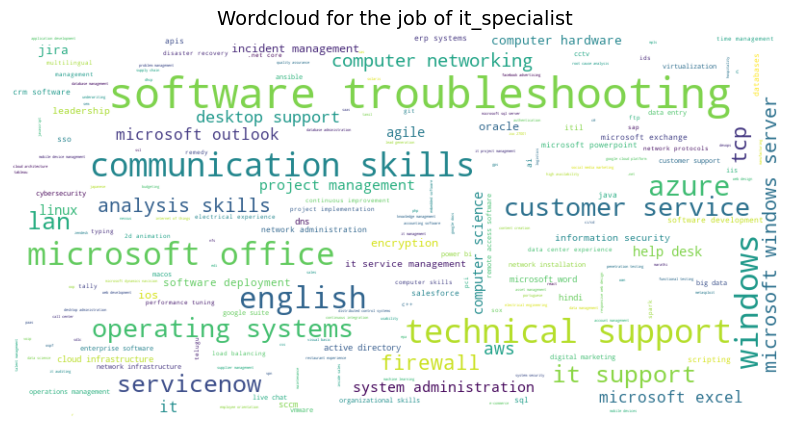

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


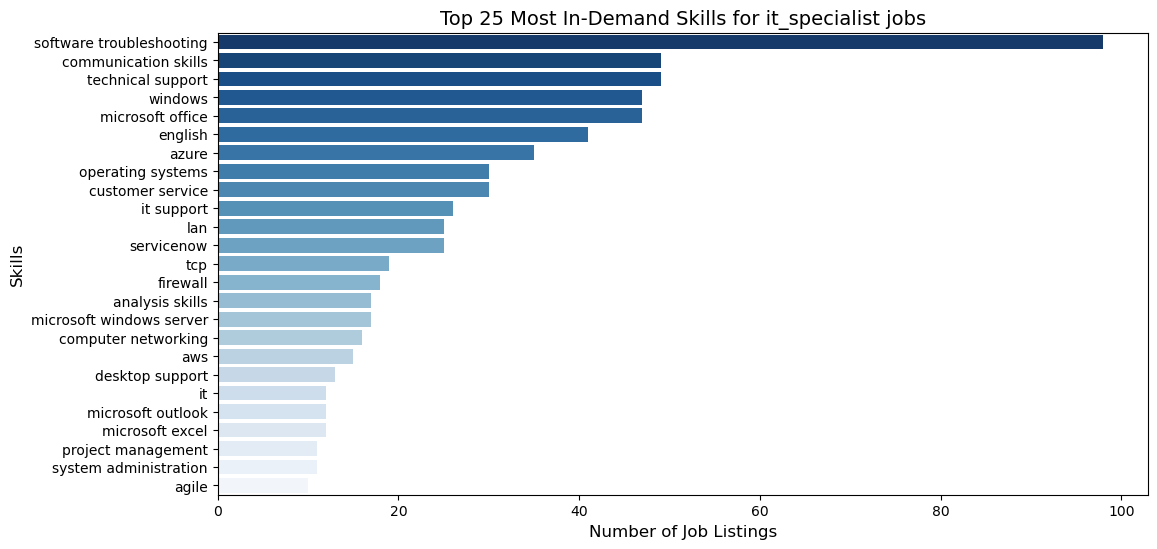

In [137]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [139]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                  company_name  salary_lpa
28                         BBS        48.0
35                     Ceragon        48.0
33     Boston Consulting Group        48.0
4         ADCI - Uttar Pradesh        48.0
32                 Bosch Group        48.0
226            Wissen InfoTech        48.0
27   BASIX Sub-K iTransactions        48.0
54                 Dicetek LLC        42.0
70               FULL Creative        42.0
67          Exela Technologies        42.0


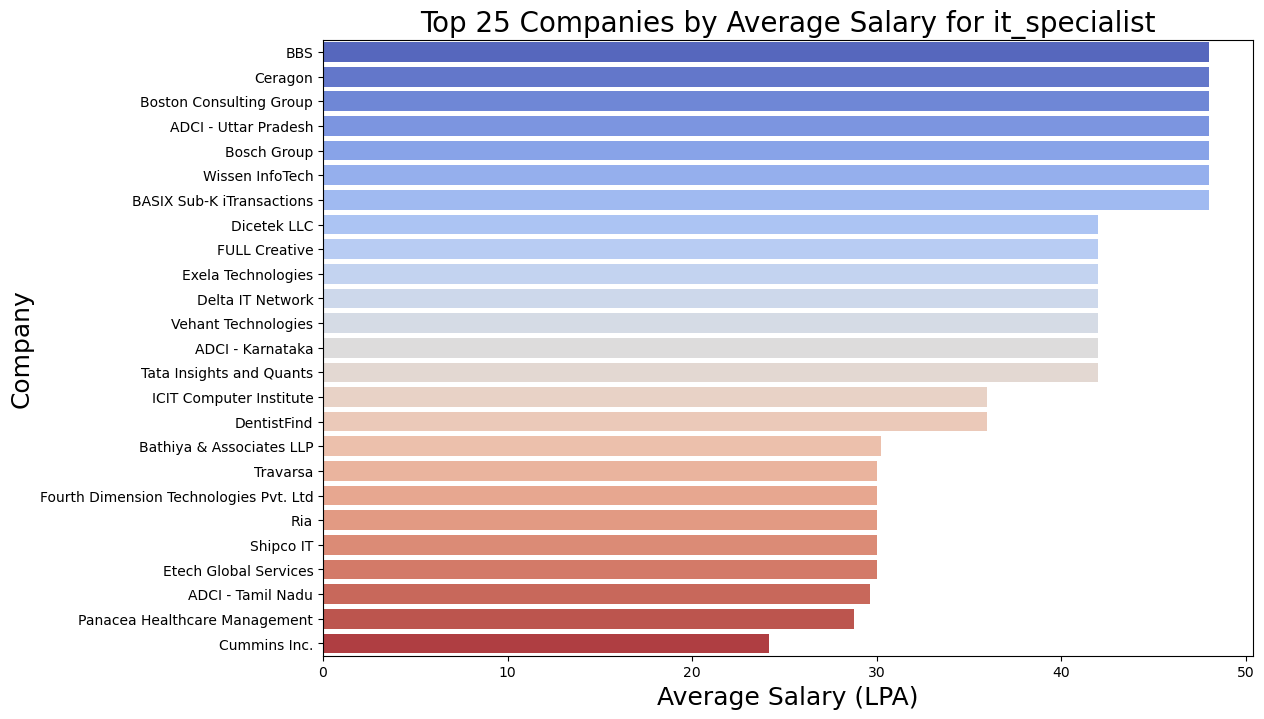

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

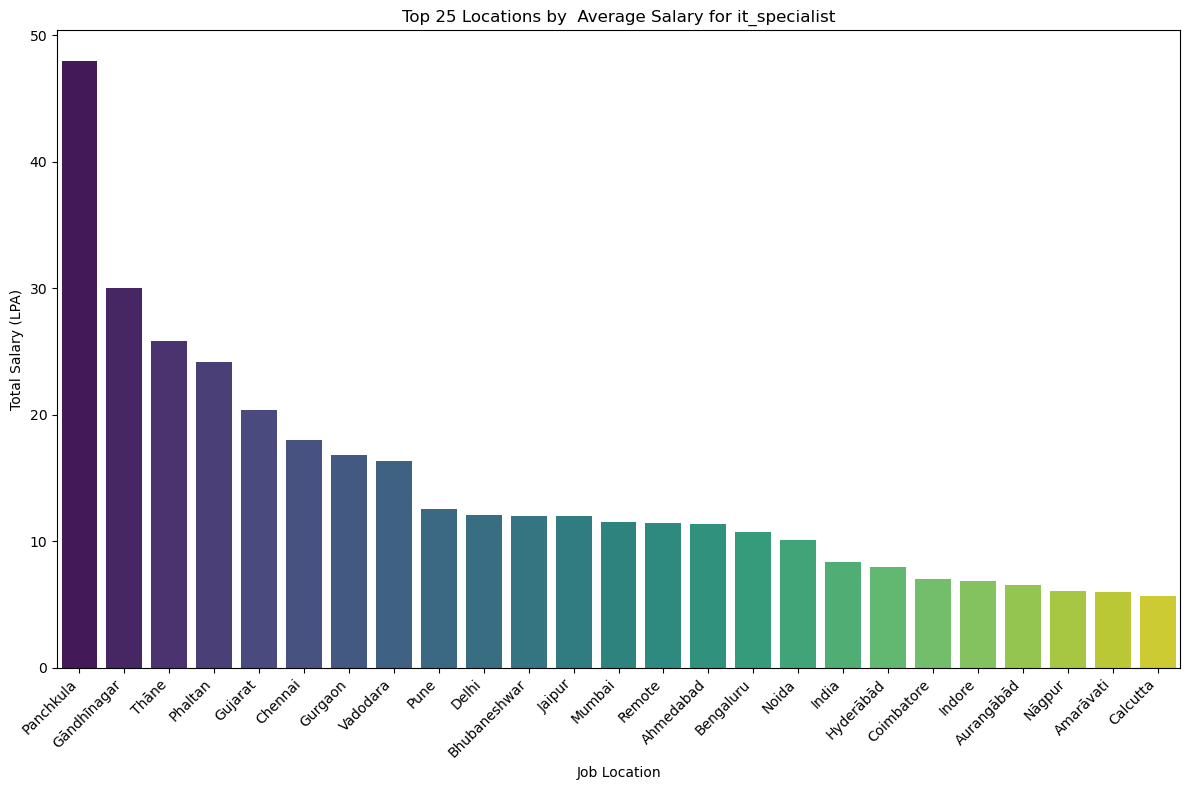

In [142]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

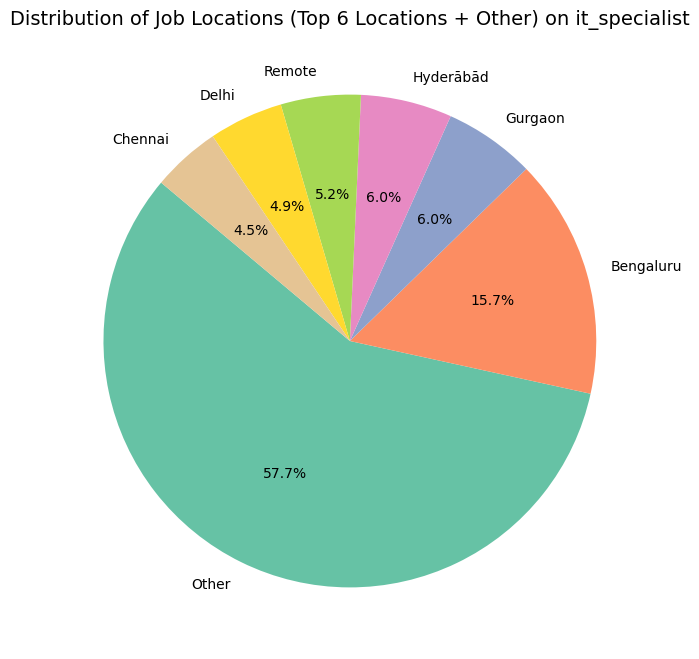

In [143]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

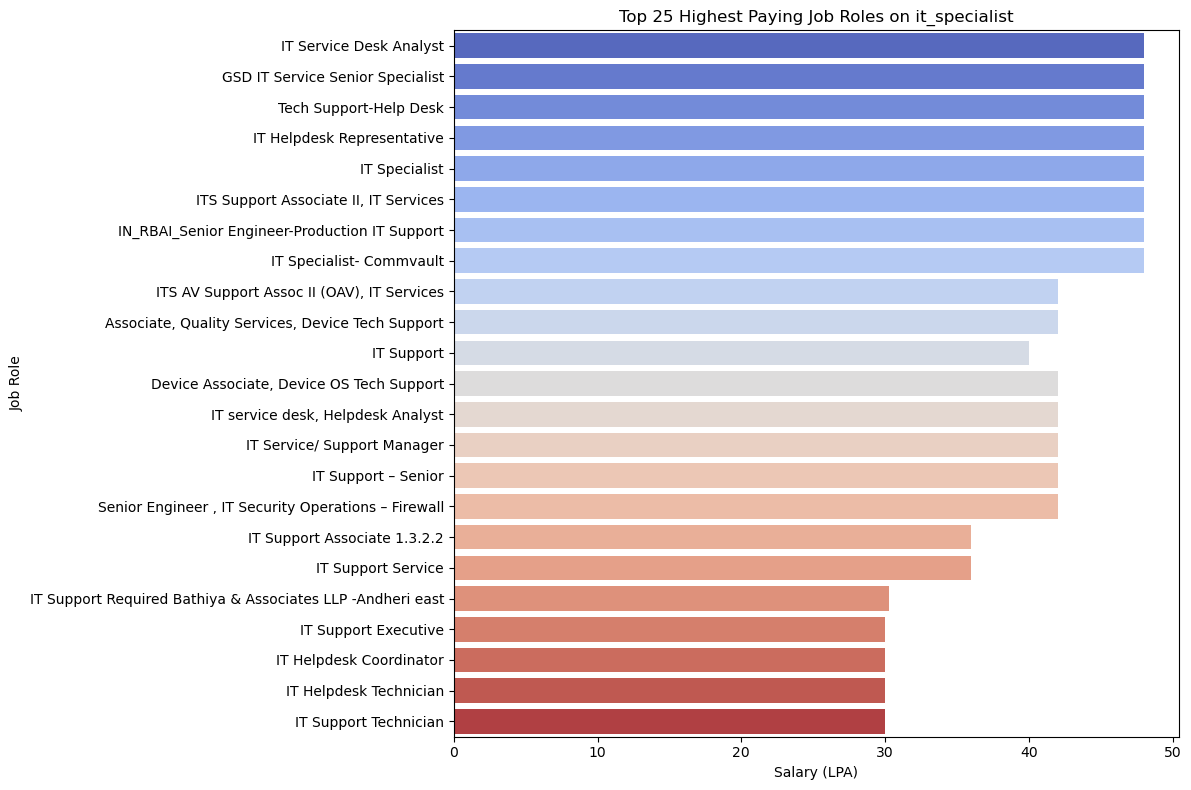

In [145]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [147]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_27844\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


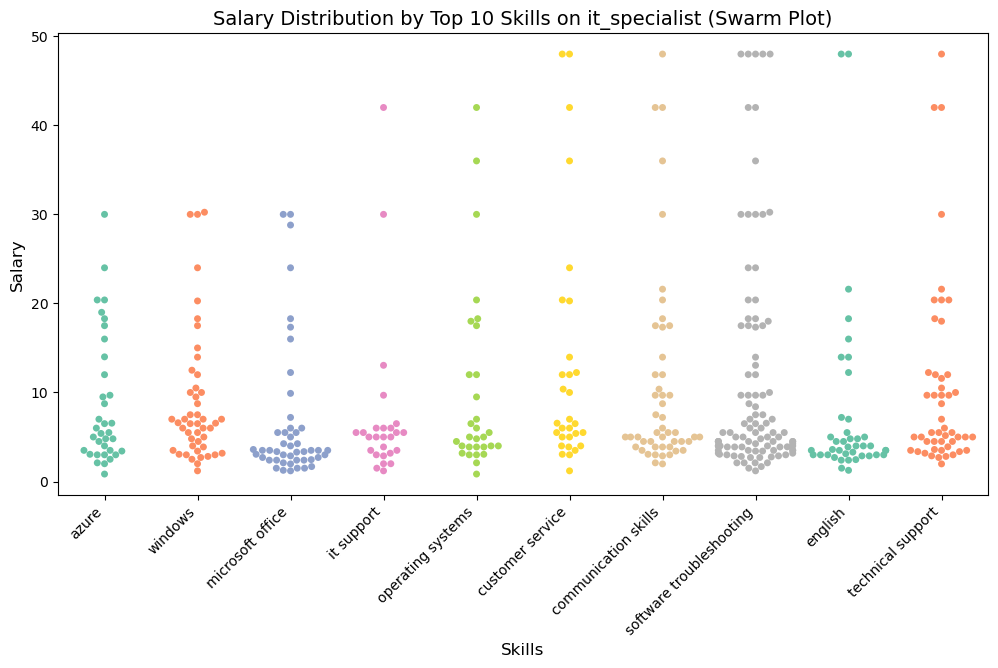

In [148]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

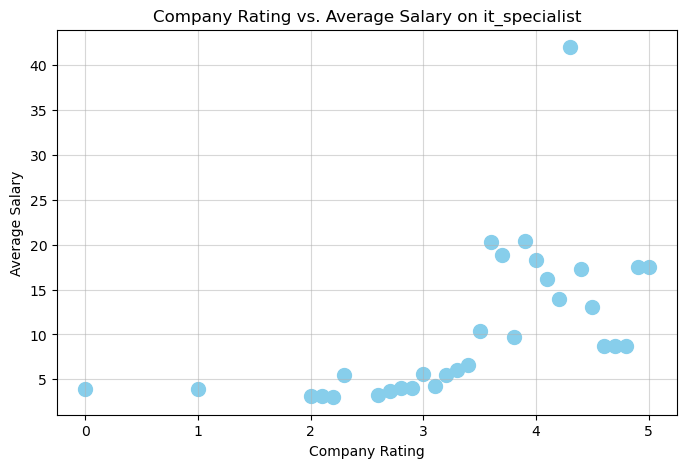

In [150]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [151]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.3116234569178003